In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("time_data.csv")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
# Display the first few rows of the dataset to understand its structure
df.head() 

,Revenue
Date,
2020-01-31,202
2020-02-29,650
2020-03-31,1020
2020-04-30,1226
2020-05-31,1397


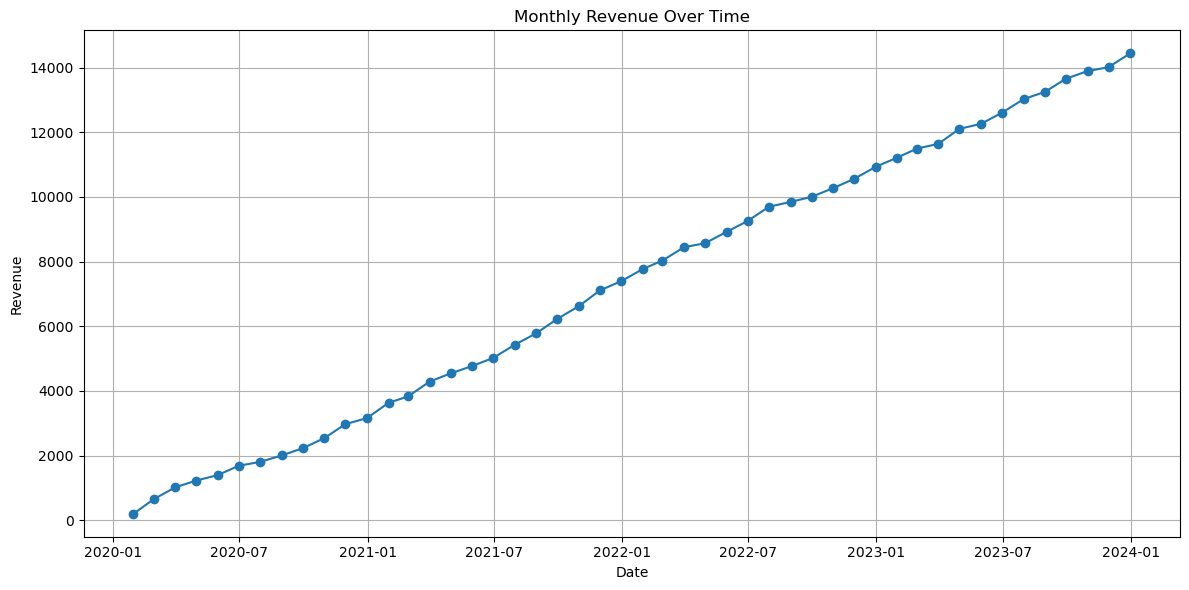

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Revenue'], marker='o', linestyle='-')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


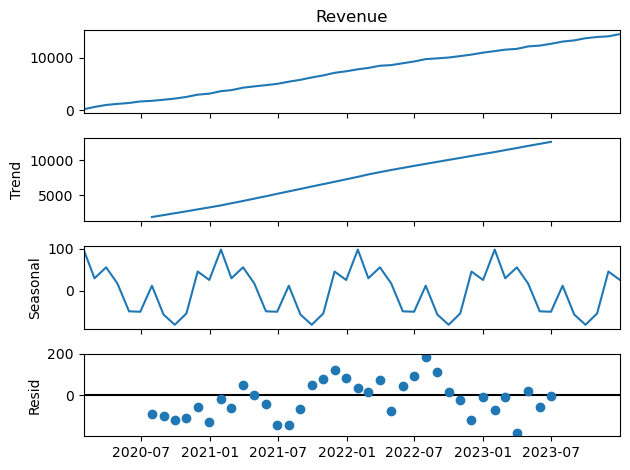

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=12)

# Plot the decomposed components
decomposition.plot()
plt.tight_layout()
plt.show()


In [11]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Revenue'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.2067406469489362
p-value: 0.9726371322609734


In [13]:
# First difference
df_diff = df['Revenue'].diff().dropna()

# Recheck stationarity
result = adfuller(df_diff)
print("After differencing - ADF Statistic:", result[0])
print("After differencing - p-value:", result[1])


After differencing - ADF Statistic: -7.897525085484426
After differencing - p-value: 4.271226579318701e-12


In [26]:
# Ensure proper frequency
df = df.asfreq('ME')  # Set frequency to Monthly

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust order if needed)
model = ARIMA(df['Revenue'], order=(1,1,1))  # (p,d,q)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())   


                               SARIMAX Results                                
Dep. Variable:                Revenue   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -290.880
Date:                Fri, 18 Jul 2025   AIC                            587.759
Time:                        19:44:03   BIC                            593.310
Sample:                    01-31-2020   HQIC                           589.848
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   9643.809      0.000       1.000       1.000
ma.L1         -0.9973      0.307     -3.248      0.001      -1.599      -0.396
sigma2      1.234e+04   2.41e-05   5.12e+08      0.0

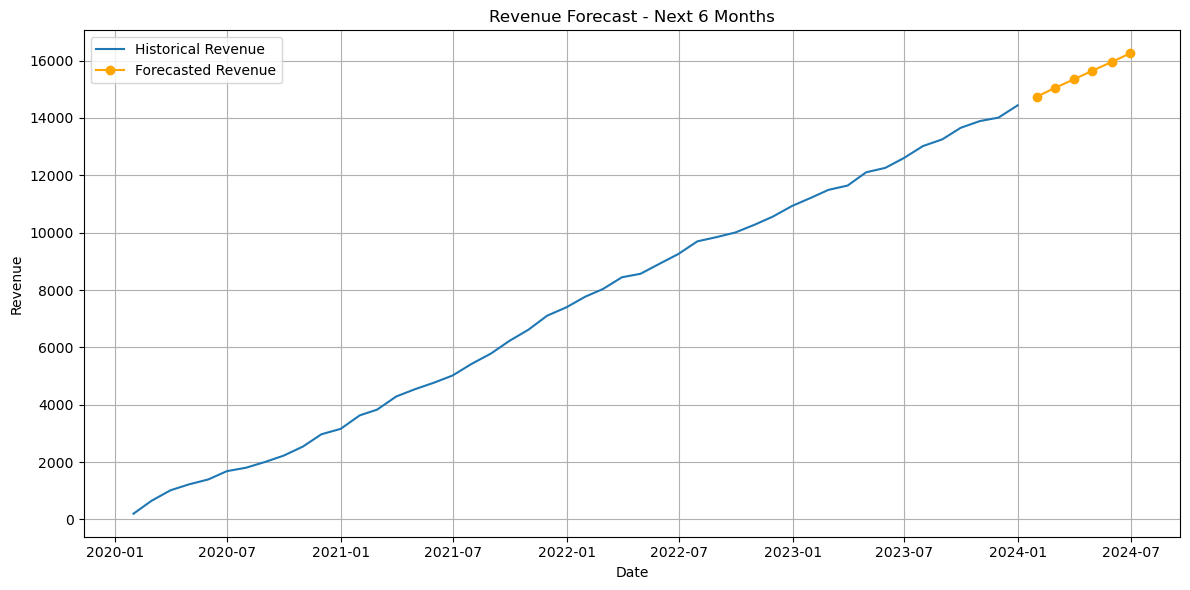

In [30]:
# Forecast the next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Generate future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=forecast_steps, freq='ME')

# Create forecast DataFrame
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Revenue': forecast.values})
forecast_df.set_index('Date', inplace=True)

# Plot actual vs forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Revenue'], label='Historical Revenue')
plt.plot(forecast_df['Forecasted_Revenue'], label='Forecasted Revenue', color='orange', marker='o')
plt.title('Revenue Forecast - Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
forecast = model_fit.forecast(steps=6)


In [36]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Revenue': forecast.values
})
forecast_df.set_index('Date', inplace=True)


In [38]:
print(forecast_df)


            Forecasted_Revenue
Date                          
2024-01-31        14741.086534
2024-02-29        15043.172930
2024-03-31        15345.259186
2024-04-30        15647.345303
2024-05-31        15949.431280
2024-06-30        16251.517119
